## Author : ANIKE MICHAEL OBINNA
### TASK TWO: Prediction using unsupervised ML 
#### In this task i will be using some techniques to predict the optimal number of clusters for the given dataset.


## Importing libraries

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.cluster import KMeans

## Loading data

In [176]:
r = pd.read_csv("Iris.csv")

In [177]:
r.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [178]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [179]:
r.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Creating an array from my dataframe

In [180]:
iris= r.iloc[:, [0, 1, 2, 3]].values

In [181]:
iris[:5]

array([[1. , 5.1, 3.5, 1.4],
       [2. , 4.9, 3. , 1.4],
       [3. , 4.7, 3.2, 1.3],
       [4. , 4.6, 3.1, 1.5],
       [5. , 5. , 3.6, 1.4]])

### visualizing my array

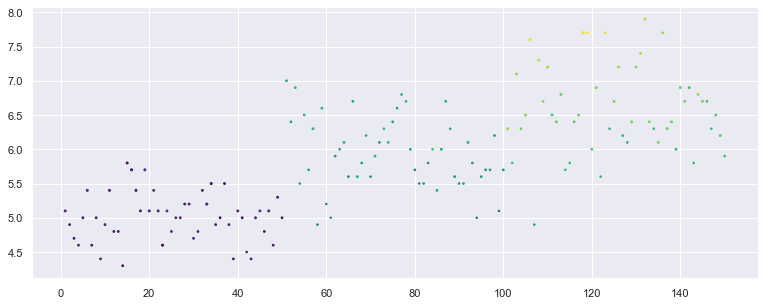

In [182]:
fig= plt.figure(figsize=(13,5))
plt.scatter(iris[:,0],iris[:,1],iris[:,2],iris[:,3], cmap="viridis")

### For choosing the most appropriate number of clustering, I will be using the **Elbow method**

The value of the point after which the kmeans inertia start decreasing in a linear fashion is my target

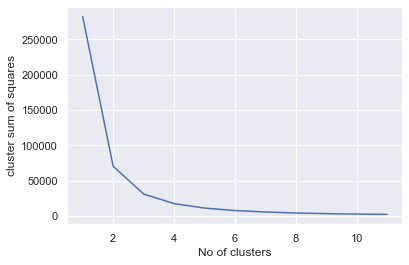

In [183]:
css = []

for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris)
    css.append(kmeans.inertia_)
    
plt.plot(range(1, 12), css)
plt.xlabel('No of clusters')
plt.ylabel('cluster sum of squares')
plt.show()

### That point seems to have fallen between 2 and 4 so i pick **3**.

In [184]:
kmeans =  KMeans(n_clusters=3)

In [185]:
kmeans.fit(iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [186]:
kmeans.cluster_centers_

array([[ 25.5  ,   5.006,   3.418,   1.464],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

### Plotting my centers

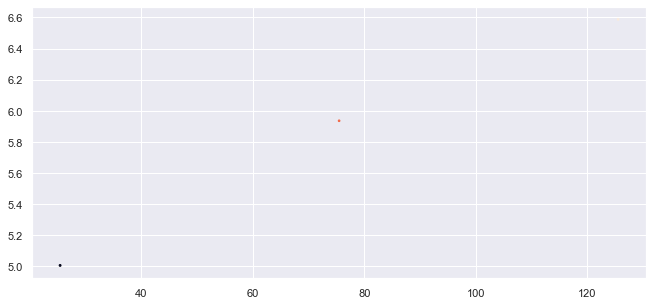

In [187]:
centres = kmeans.cluster_centers_
fig= plt.figure(figsize=(11,5))
plt.scatter(centres[:,0],centres[:,1],centres[:,2],centres[:,3])

In [188]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Finally, visualizing the clustering

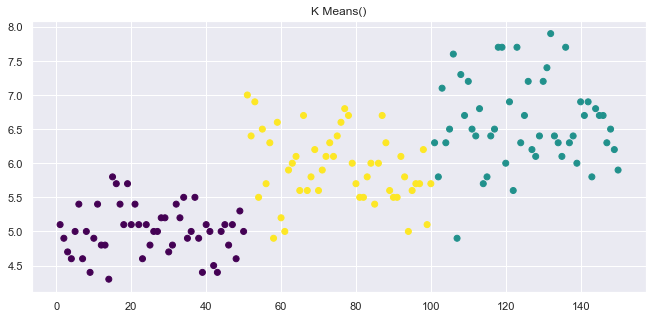

In [189]:
fig= plt.figure(figsize=(11,5))
ax = plt.subplot()
ax.set_title("K Means()")
ax.scatter(iris[:,0],iris[:,1], c= kmeans.labels_, cmap= "viridis")

# Conclusion

## From my final plot you can see there is about zero between cluster
## So I believe that the optimal number of clusters is **3**.